In [4]:
using PyPlot, MultivariateStats, Distributions

In [15]:
g_Data=readcsv("grade_attend.csv")
grade=g_Data[:,1]
attend=g_Data[:,2];
println("The number of students is $(length(attend))")

The number of students is 43


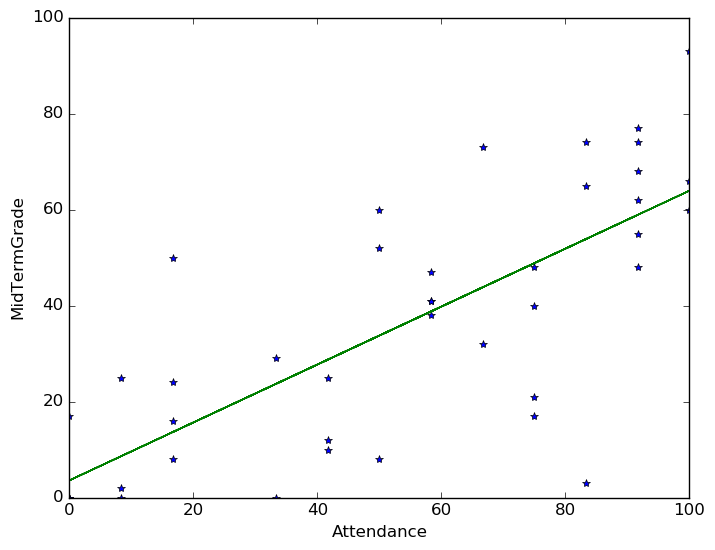

In [16]:
p=llsq(attend'',convert(Array{Float64,1},grade))
plot(attend,grade,"*",attend,p[1]*attend+p[2])
xlabel("Attendance")
ylabel("MidTermGrade");

In [21]:
println("The correlation between grade and attendance is $(round(Int,cor(attend,grade)*100))%") # 76% correlation

The correlation between grade and attendance is 77%


In [22]:
min_pass=(50-p[2])/p[1] # A student needs to have an attendance of 77% to pass
println("A student needs to hae an attendance of $(round(Int,min_pass))% to pass")

A student needs to hae an attendance of 77% to pass


Now lets look at some distributions

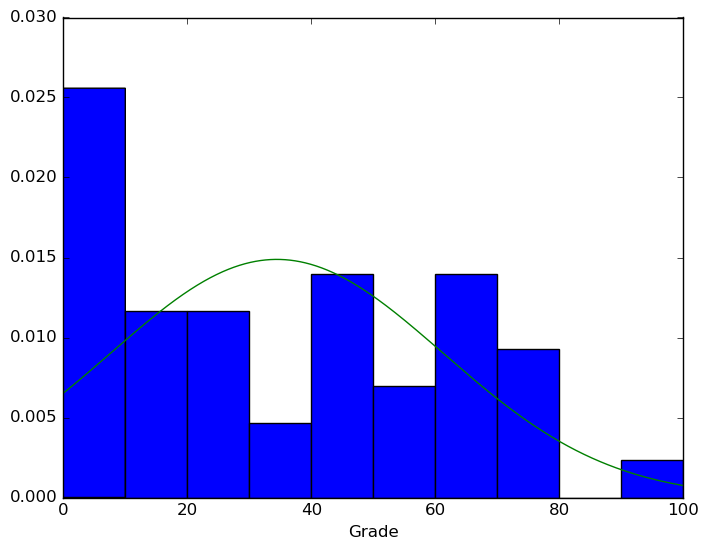

In [8]:
ax=subplot(1,1,1)
ax[:hist](grade,10, normed=1,range=(0,100));
xlabel("Grade")
dist_g=fit(Normal,grade)
x=[0:0.1:100...]
ax[:plot](x,pdf(dist_g,x));

In [9]:
dist_g

Distributions.Normal{Float64}(μ=34.44186046511628, σ=26.807932118043837)

In [31]:
println("The pass rate is $(round(Int,100*count(x->x>=50,grade)/length(grade)))%")

The pass rate is 33%


# Now we filter out the students who missed 50% or more

In [24]:
grade_f_50=filter(x->x>0,attend[i] > 50 ? grade[i]:-1 for i in eachindex(grade)) |>collect
println("Number of students after the filter is $(length(grade_f_50))")

Number of stundents after the filter is 22


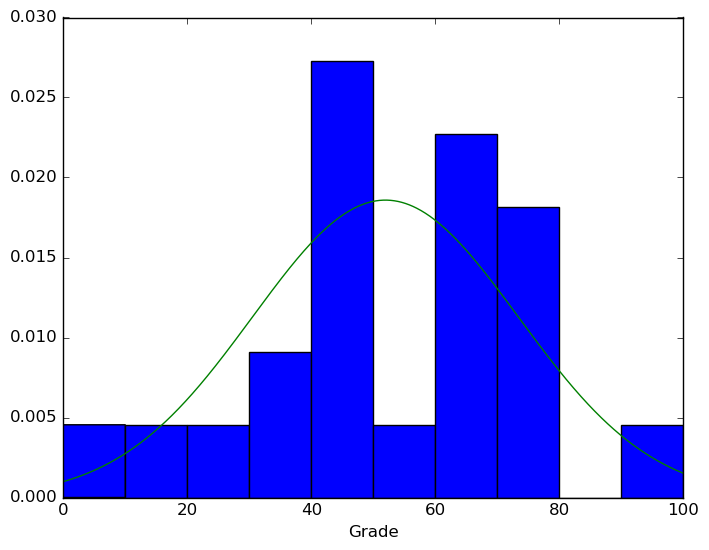

In [26]:
ax=subplot(1,1,1)
ax[:hist](grade_f_50,10, normed=1,range=(0,100));
xlabel("Grade")
dist_g_f50=fit(Normal,grade_f_50)
x=[0:0.1:100...]
ax[:plot](x,pdf(dist_g_f50,x));

In [27]:
dist_g_f50`

Distributions.Normal{Float64}(μ=51.95454545454545, σ=21.463451541308906)

In [30]:
println("The pass rate is $(round(Int,100*count(x->x>=50,grade_f_50)/length(grade_f_50)))%")

The pass rate is 50%


# Now we filter out the students who missed 25% or more

In [32]:
grade_f_75=filter(x->x>0,attend[i] > 75 ? grade[i]:-1 for i in eachindex(grade)) |>collect
println("Number of students after the filter is $(length(grade_f_50))")

Number of students after the filter is 22


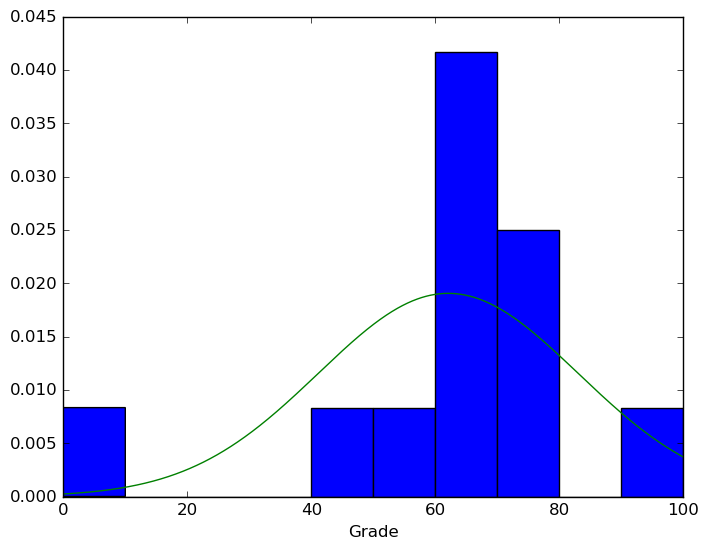

In [11]:
ax=subplot(1,1,1)
ax[:hist](grade_f_75,10, normed=1,range=(0,100));
xlabel("Grade")
dist_g_f75=fit(Normal,grade_f_75)
x=[0:0.1:100...]
ax[:plot](x,pdf(dist_g_f75,x));

In [12]:
dist_g_f75

Distributions.Normal{Float64}(μ=62.083333333333336, σ=20.94619429766552)

In [33]:
println("The pass rate is $(round(Int,100*count(x->x>=50,grade_f_75)/length(grade_f_75)))%")

The pass rate is 83%


**Conclustion**: If we exclude the those who attend less than 75% percent of the lectures, the results are more sensible. Effectively, we are teaching 12 students.